In [15]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats 


# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse = pd.read_csv(mouse_drug_data_to_load)
trial = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
merged = pd.merge(trial, mouse, on='Mouse ID', how='outer')

# Display the data table for preview
merged.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mergeMean = merged.groupby(['Drug', 'Timepoint'])
mergeMean2 = mergeMean['Tumor Volume (mm3)'].mean()
# Convert to DataFrame
volumeMean = pd.DataFrame(mergeMean2)
# Preview DataFrame
volumeMean.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
stdErrGrp = merged.groupby(['Drug', 'Timepoint'])
stdErr = stdErrGrp['Tumor Volume (mm3)'].sem()
# Convert to DataFrame
stdErrFrame = pd.DataFrame(stdErr)
# Preview DataFrame
stdErrFrame.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [4]:
# Minor Data Munging to Re-Format the Data Frames
volumeClean = volumeMean.unstack('Drug')
volumeClean = volumeClean['Tumor Volume (mm3)']
# Preview that Reformatting worked
volumeClean.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


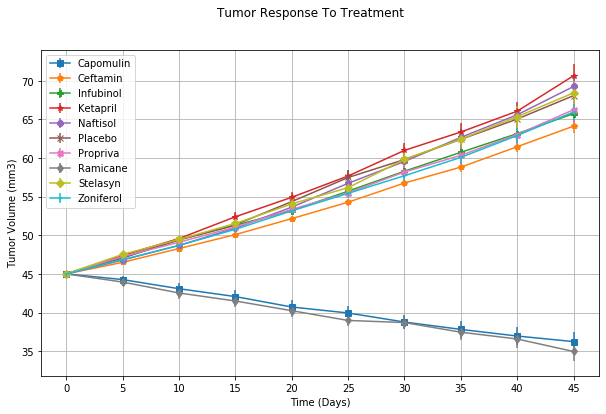

In [5]:
errClean = stdErrFrame.unstack('Drug')
errClean = errClean['Tumor Volume (mm3)']
# Preview that Reformatting worked

# Generate the Plot (with Error Bars)
m=['s', 'p', 'P', '*', '8', 'x', 'X', 'd', 'D', '1']
counter = 0
handles = volumeClean.columns
x_ax = volumeClean.index 
fig, ax = plt.subplots()
for each in handles:
    ax.errorbar(x_ax, volumeClean[each], errClean[each], marker=m[counter])
    counter += 1


# Save the Figure
fig.suptitle('Tumor Response To Treatment')
ax.set_xlabel('Time (Days)')
ax.set_ylabel('Tumor Volume (mm3)')
fig.set_figwidth(10)
fig.set_figheight(6)
ax.set_xticks(np.arange(0,50,5))
ax.grid()
ax.legend(handles, loc=2)
plt.savefig('TumorResponseToTreatment.png')
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meanMetGrp = merged.groupby(['Drug', 'Timepoint'])
meanMet = meanMetGrp['Metastatic Sites'].mean()
# Convert to DataFrame
meanMetFrame = pd.DataFrame(meanMet)
# Preview DataFrame
meanMetFrame.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
semMetGrp = merged.groupby(['Drug', 'Timepoint'])
semMet = semMetGrp['Metastatic Sites'].sem()
# Convert to DataFrame
semMetFrame = pd.DataFrame(semMet)
# Preview DataFrame
semMetFrame.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
meanMetClean = meanMetFrame.unstack('Drug')
meanMetClean = meanMetClean['Metastatic Sites']
# Preview that Reformatting worked
meanMetClean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


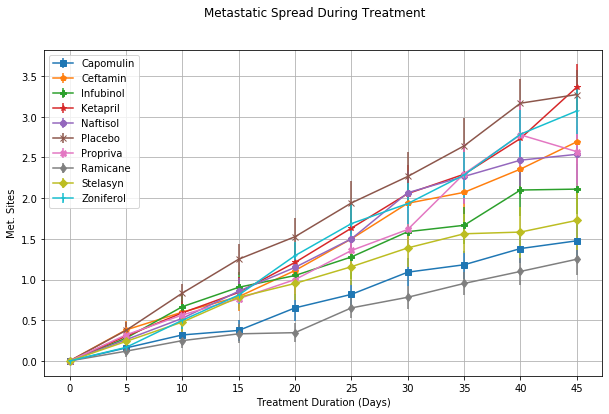

In [9]:
errMetClean = semMetFrame.unstack('Drug')
errMetClean = errMetClean['Metastatic Sites']
# Preview that Reformatting worked

# Generate the Plot (with Error Bars)
mark=['s', 'p', 'P', '*', '8', 'x', 'X', 'd', 'D', '1']
counter2 = 0
handles2 = meanMetClean.columns
y_ax = meanMetClean.index 
fig2, ax2 = plt.subplots()
for each in handles2:
    ax2.errorbar(y_ax, meanMetClean[each], errMetClean[each], marker=mark[counter2])
    counter2 += 1


# Save the Figure
fig2.suptitle('Metastatic Spread During Treatment')
ax2.set_xlabel('Treatment Duration (Days)')
ax2.set_ylabel('Met. Sites')
fig2.set_figwidth(10)
fig2.set_figheight(6)
ax2.set_xticks(np.arange(0,50,5))
ax2.grid()
ax2.legend(handles2, loc=2)
plt.savefig('MetastaticSpreadDuringTreatment.png')
plt.show()

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mouseCountGrp = merged.groupby(['Drug', 'Timepoint']).count()
mouseCount = mouseCountGrp['Mouse ID']
# Convert to DataFrame
mouseCountFrame = pd.DataFrame(mouseCount)
# Preview DataFrame
mouseCountFrame.head()
# Convert to DataFrame

# Preview DataFrame


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23

In [11]:
# Minor Data Munging to Re-Format the Data Frames
mouseCountClean = mouseCountFrame.unstack('Drug')
mouseCountClean = mouseCountClean['Mouse ID']
# Preview the Data Frame
mouseCountClean.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


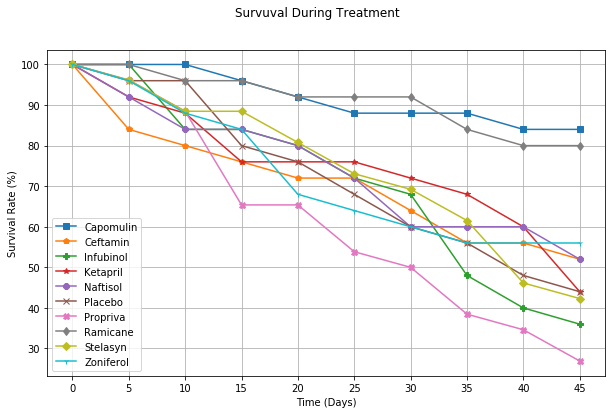

Timepoint
0     100.0
5      96.0
10     88.0
15     84.0
20     68.0
25     64.0
30     60.0
35     56.0
40     56.0
45     56.0
Name: Zoniferol, dtype: float64

In [12]:
# Generate the Plot (Accounting for percentages)



marks=['s', 'p', 'P', '*', '8', 'x', 'X', 'd', 'D', '1']
counter3 = 0
handles3 = mouseCountClean.columns
z_ax = mouseCountClean.index 
fig3, ax3 = plt.subplots()
for each in mouseCountClean:
    perc = mouseCountClean[each]/mouseCountClean.loc[0,each]*100
    plt.plot(z_ax, perc, marker=marks[counter3])
    counter3 += 1

# Save the Figure
fig3.suptitle('Survuval During Treatment')
ax3.set_xlabel('Time (Days)')
ax3.set_ylabel('Survival Rate (%)')
fig3.set_figwidth(10)
fig3.set_figheight(6)
ax3.set_xticks(np.arange(0,50,5))
ax3.grid()
ax3.legend(handles3, loc='best')
plt.savefig('SurvivalDuringTreatment.png')
# Save the Figure

# Show the Figure
plt.show()
perc

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percs =[]
for i in volumeClean:
    percBar = (((volumeClean.loc[45,i]/volumeClean.loc[0,i])-1)*100).round(6)
    percs.append(percBar)
percs
    
    
    
    #plt.plot(z_ax, perc, marker=marks[counter3])
    #counter3 += 1
# Display the data to confirm


[-19.475303,
 42.516492,
 46.123472,
 57.028795,
 53.923347,
 51.29796,
 47.241175,
 -22.3209,
 52.085134,
 46.579751]

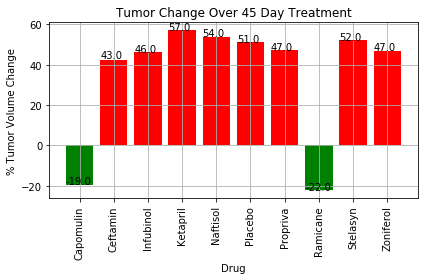

In [17]:
# Store all Relevant Percent Changes into a Tuple
passing = []
colors = []
failing = []
tuplePercs = tuple(percs)
# Splice the data between passing and failing drugs
for per in tuplePercs:
    if per <0:
        passing.append(per)
        colors.append('green')
    if per >0:
        failing.append(per)
        colors.append('red')

# Orient widths. Add labels, tick marks, etc. 
bars = plt.bar(volumeClean.columns, tuplePercs, color=colors)

# Use functions to label the percentages of changes
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid()
plt.xticks(rotation=90)
# Call functions to implement the function calls
for bar in bars:
    yval = bar.get_height().round(0)
    plt.text(bar.get_x(), yval + .005, yval)

# Save the Figure
plt.tight_layout()
plt.savefig('TumorChangeOver45Days.png')

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)

In [18]:
#Insights: 
    
 #   1. Only 2 of the 10 drugs cause a decrease in tumor volume. 
 #       Since the Placebo experiment caused a significant increase 
 #       in size, it is highly possible the the 2 drugs directly led to the decrease in tumor volume. 
 #   2. Those same 2 drugs had the highest survival rate and the loewst Metastatic spread during treatment. 
 #       This is more evidence that supports that the 2 drugs themselves directly affect the tumor size and growth rate. 
 #   3. According to this sample of drugs, only 20% of tumor responsive drugs actually have a positive impact on the patient. 